### Project - Dallas Shootings

### Goal of Project
A newspaper want a visualization of the shootings in Dallas with focus on subjects

We will read data from from database and join into broader datasets

We will explore ideas to visualize it and create a map with the shootings

### Step 1: Acquire
Explore problem |
Identify data |
Import data

### Import Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Connect to SQLite Database

Using sqlite3 to connect to the databse

In [2]:
conn = sqlite3.connect("dallas-ois.sqlite")

### Read data from each table into Dataframes

In [3]:
incident = pd.read_sql("SELECT * FROM incidents", conn)
officers = pd.read_sql("SELECT * FROM officers", conn)
subjects = pd.read_sql("SELECT * FROM subjects", conn)

In [4]:
len(incident), len(officers), len(subjects)

(219, 370, 223)

In [5]:
incident.head()

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,244659R,2006-04-03,6512 South Loop 12,Injured,Hands,"Watkins, Caleb B/M",1,"Armstrong, Michael W/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, April 3, 2006, at approximately 11:...",NaN,NaN


In [6]:
subject_incidents = pd.read_sql("SELECT * FROM subjects JOIN incidents ON subjects.case_number=incidents.case_number", conn)

In [7]:
subject_incidents.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,L,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,B,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,B,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [8]:
subject_incidents.dtypes

case_number                    object
race                           object
gender                         object
last_name                      object
first_name                     object
full_name                      object
case_number                    object
date                           object
location                       object
subject_statuses               object
subject_weapon                 object
subjects                       object
subject_count                   int64
officers                       object
officer_count                   int64
grand_jury_disposition         object
attorney_general_forms_url     object
summary_url                    object
summary_text                   object
latitude                      float64
longitude                     float64
dtype: object

In [9]:
subject_incidents.isnull().sum()

case_number                     0
race                            0
gender                          0
last_name                       0
first_name                     18
full_name                       0
case_number                     0
date                            0
location                        0
subject_statuses                0
subject_weapon                  0
subjects                        0
subject_count                   0
officers                        0
officer_count                   0
grand_jury_disposition         88
attorney_general_forms_url    221
summary_url                     3
summary_text                    3
latitude                        9
longitude                       9
dtype: int64

Notice that the feature gives us some understanding about the data as we are about to explore it. Let's look at some features that help our findings.

In [10]:
subject_incidents.groupby('subject_statuses').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_statuses,,,,,,,,,,,,,,,,,,,,
1 Deceased 1 Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
2 Injured,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Deceased,69,69,69,69,67,69,69,69,69,69,69,69,69,69,67,1,67,67,68,68
Deceased Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Injured,60,60,60,60,60,60,60,60,60,60,60,60,60,60,58,1,60,60,57,57
Other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,1,1
Shoot and Miss,87,87,87,87,71,87,87,87,87,87,87,87,87,87,4,0,86,86,83,83


In [11]:
subject_incidents.groupby('race').count()

,case_number,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
race,,,,,,,,,,,,,,,,,,,,
A,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2
B,111,111,111,104,111,111,111,111,111,111,111,111,111,111,67,0,109,109,106,106
L,72,72,72,61,72,72,72,72,72,72,72,72,72,72,37,2,71,71,68,68
W,38,38,38,38,38,38,38,38,38,38,38,38,38,38,31,0,38,38,38,38


### Visualize the Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

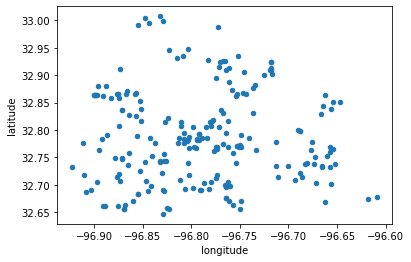

In [12]:
subject_incidents.plot.scatter(x="longitude", y="latitude")

In [13]:
dataset = subject_incidents[['race','subject_statuses','latitude','longitude']].dropna()

In [14]:
mapping = {"B":'b',"W":'y','A':'r','L':'c'}
dataset['race'] = dataset['race'].apply(lambda x:mapping[x])
dataset.head()

,race,subject_statuses,latitude,longitude
9,c,Deceased,32.68642,-96.908674
10,b,Deceased,32.86400,-96.898998
11,y,Shoot and Miss,32.81482,-96.826787
12,b,Injured,32.77540,-96.767489
13,b,Shoot and Miss,32.74417,-96.828470


### Convert the Column

In [15]:
mapping = {'Deceased':1000, "Injured":500, "Shoot and Miss":250}
dataset['subject_statuses'] = dataset['subject_statuses'].apply(lambda x:mapping.get(x,100))

<AxesSubplot:title={'center':'Shooting at Dallas'}, xlabel='longitude', ylabel='latitude'>

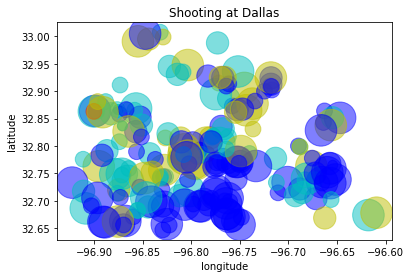

In [16]:
dataset.plot.scatter(x='longitude',y='latitude',s= 'subject_statuses', c = 'race', alpha= .5, title = "Shooting at Dallas")

#### What the above visualization shows that the bigger the circle the more severe the injury was - like a death of a person, and this is mapped according to the race

### Further Improvements in the visualisation.

In [17]:
# !pip install folium

In [18]:
import folium

In [19]:
m = folium.Map(location=[32.8, -96.8])
m

In [24]:
for _, row in dataset.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['subject_statuses']//100,
        color=row['race'],
        fill =True,
        fill_color=row['race']
    ).add_to(m)

In [25]:
m